In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import datetime
import numpy as np
import cv2
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from owslib.wms import WebMapService
from skimage.feature import hog
import io

wms = WebMapService('https://kartta.hel.fi/ws/geoserver/avoindata/wms', version='1.1.1')

#print all layers available on the server
#od=wms.contents
#for key, value in od.items(): 
#    print(key, value)


df=pd.read_csv('PixelLabels_patchx_011_patchy_010_res_4000.csv', sep=',') # read in coords of road marking pixels in patch (x-11,y-10)

#print("PixelLabels_patchx_011_patchy_010_res_4000.csv".split("_res_"))

In [2]:
# list(wms.contents)
# layer='avoindata:Ortoilmakuva_2019_5cm'

# print(wms[layer].boundingBox)
# print(wms[layer].boundingBoxWGS84)
# print(wms[layer].crsOptions)

xmin = 24.92
ymin = 60.15
xmax = 24.99
ymax = 60.20

nr_patches_x = 50 
nr_patches_y = 50 

patch_x = (xmax-xmin)/nr_patches_x  
patch_y = (ymax-ymin)/nr_patches_y



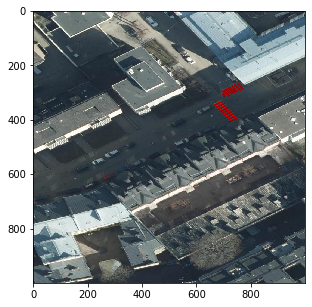

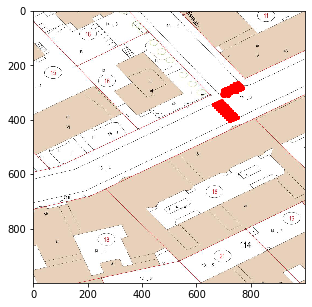

In [3]:





#img = wms.getmap(layers=['avoindata:Ortoilmakuva_2019_5cm'],srs='EPSG:4326',bbox=(24.939,60.161,24.945,60.164),size=(5000,5000),format='image/jpeg',transparent=True)
nr_x = 11 
nr_y = 10
patch_box = (xmin+nr_x*patch_x,ymin+nr_y*patch_y,xmin+(nr_x+1)*patch_x,ymin+(nr_y+1)*patch_y) 

ortholayer = 'avoindata:Ortoilmakuva_2019_5cm'
cs = 'EPSG:4326'
resx=1000
res = (resx,resx)

img = wms.getmap(layers=[ortholayer],srs=cs,bbox=patch_box,size=res,format='image/jpeg',transparent=True)
#filename = 'Helsinki_patchx_{:03d}_patchy_{:03d}_resolution_{:03d}.jpg'.format(nr_x,nr_y,resx) 
#out = open(filename, 'wb')
#out.write(img.read())
#out.close()
plt.figure(figsize=(5, 5))
A_1 = np.asarray(Image.open(io.BytesIO(img.read())))
#A_1 = mpimg.imread(filename)
#plt.imshow(mpimg.imread('out.jpg'))
fig=plt.imshow(A_1)
#fig.axes.get_xaxis().set_visible(False)
#fig.axes.get_yaxis().set_visible(False)
plt.savefig("Layer_AerialPhoto.jpg", dpi=300, bbox_inches='tight', pad_inches=0)
plt.scatter(df['cols'].values/4, df['rows'].values/4,s=1/10000, c='r', marker='.')
plt.savefig("Layer_AerialPhotoLabels.jpg", dpi=300)
plt.show()


img = wms.getmap(layers=['Karttasarja'],srs=cs,bbox=patch_box,size=res,format='image/jpeg',transparent=True)
#filename = 'Helsinki_patchx_{:03d}_patchy_{:03d}_resolution_{:03d}.jpg'.format(nr_x,nr_y,resx) 
#out = open(filename, 'wb')
#out.write(img.read())
#out.close()
plt.figure(figsize=(5, 5))
A_1_layer_1 = np.asarray(Image.open(io.BytesIO(img.read())))
#A_1 = mpimg.imread(filename)
#plt.imshow(mpimg.imread('out.jpg'))
fig=plt.imshow(A_1_layer_1)
#fig.axes.get_xaxis().set_visible(False)
#fig.axes.get_yaxis().set_visible(False)
plt.savefig("Layer_Karttasarja.jpg", dpi=300,bbox_inches='tight', pad_inches=0)
plt.scatter(df['cols'].values/4, df['rows'].values/4,s=6, c='r', marker='.')
plt.show()



#image = np.frombuffer(img.read())


342


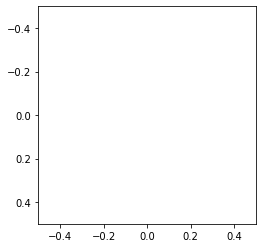

train accurarcy = 0.9492537313432836
test accurarcy = 0.9353535353535354
[136]


/Users/alexanderjung/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/alexanderjung/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


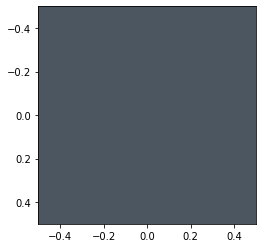

0.9942857142857143


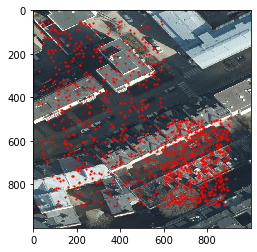

In [7]:
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

#pixelx = df['cols'][100]
#pixely = df['rows'][100]

nr_x = 11
nr_y = 10

rows = df['rows'].values/4
cols = df['cols'].values/4

rows = rows.astype(int)
cols = cols.astype(int)

print(rows[3])

len_x = 0 
len_y = 0

nr_features = 2*3*(2*len_x+1)*(2*len_y+1)  # 2 layers (orthophot +karrta) times 3 colors times nr of pixels

number_road_markings = rows.shape[0]

nr_samples = 500 # rows.shape[0]
permutation = np.random.randint(0,number_road_markings-1, size=nr_samples)
X = np.zeros((nr_samples,nr_features))

# features and labels of patches whose center pixel is road marking 

for idx_sample in range(nr_samples):
     pixelx = cols[permutation[idx_sample]]
     pixely = rows[permutation[idx_sample]]
     B = A_1[(pixely-len_y):(pixely+len_y+1),(pixelx-len_x):(pixelx+len_x+1)]
     tmp = B.reshape(1,-1)
    
     B = A_1_layer_1[(pixely-len_y):(pixely+len_y+1),(pixelx-len_x):(pixelx+len_x+1)]
     tmp_1 = B.reshape(1,-1)
    
     X[idx_sample,:] = np.hstack((tmp,tmp_1)); 
        
y= np.ones((nr_samples,1))

plt.imshow(B) 
#print(B)
plt.show()



# features and labels of patches whose center pixel is not road marking 
nr_non_marking_samples = 1000

rows = np.random.randint(50,900, size=int(nr_non_marking_samples/2))
cols = np.random.randint(20,600,size=int(nr_non_marking_samples/2))

rows_tmp = np.random.randint(500,900, size=int(nr_non_marking_samples/2))
cols_tmp = np.random.randint(600,900,size=int(nr_non_marking_samples/2))
rows = np.append(rows,rows_tmp)
cols = np.append(cols,cols_tmp)

X_tmp = np.zeros((nr_non_marking_samples,nr_features))
for iter_sample in range(nr_non_marking_samples):
        pixelx = cols[iter_sample] 
        pixely = rows[iter_sample]
        B =  A_1[(pixely-len_y):(pixely+len_y+1),(pixelx-len_x):(pixelx+len_x+1)]
        tmp = B.reshape(1,-1)
        B = A_1_layer_1[(pixely-len_y):(pixely+len_y+1),(pixelx-len_x):(pixelx+len_x+1)]
        tmp_1 = B.reshape(1,-1)
        X_tmp[iter_sample,:] = np.hstack((tmp,tmp_1)); 

X = np.vstack((X,X_tmp))


y = np.vstack((y,-np.ones((nr_non_marking_samples,1))))    

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
 

#mlp = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=1000, alpha=1e-4,
 #                   solver='sgd', verbose=10, random_state=1,
  #                  learning_rate_init=.1)


clf = LogisticRegression(random_state=0).fit(X_train, y_train)
#mlp.fit(X_train, y_train)

print("train accurarcy =", clf.score(X_train, y_train))
print("test accurarcy =", clf.score(X_test, y_test))

y_pred_test = clf.predict(X_test).reshape((-1,1))

tmp = y_pred_test*(-1)+y_test  ## entries are 2 only if true label is 1 (road marking) but predicted label is -1

samples_missed = np.where(tmp> 1) 
samples_missed= samples_missed[0]
print(samples_missed)

C = X_test[samples_missed[0],:int(nr_features/2)]
C = (C.reshape((2*len_y+1,2*len_x+1,3)))
plt.imshow(C/255) 
plt.show()


result = np.where( (abs(y_test-1)<0.1) & (abs(y_pred_test-1)<0.1))
roadpixels = np.where(abs(y_test-1)<0.1) 
noroadpixels = np.where(abs(y_test+1)<0.1) 
roadpixels = roadpixels[0]
noroadpixels= noroadpixels[0]
result = result[0]
missed_rate = result.shape[0]/roadpixels.shape[0]


print(missed_rate)

plt.imshow(A_1)

plt.scatter(cols, rows,s=6, c='r', marker='.')
plt.show()



Now let us try out the classifier learnt on the patch with labeled pixels on another pach. 

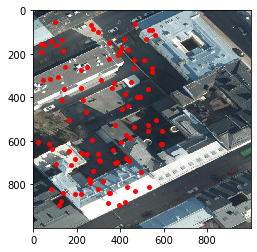

[0.45603574 0.54396426]


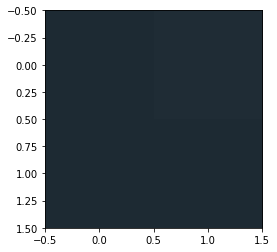

[0.26415476 0.73584524]


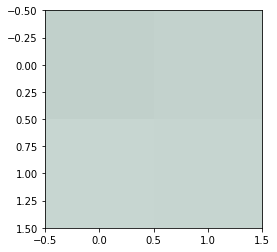

[0.3284636 0.6715364]


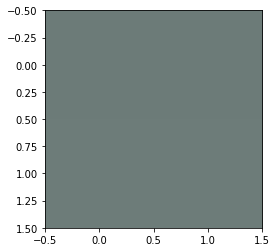

[0.39175474 0.60824526]


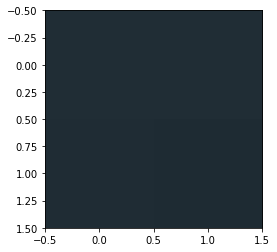

[0.08740795 0.91259205]


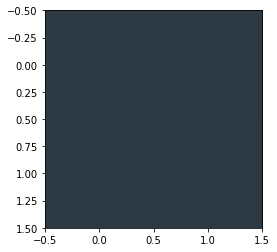

[0.02843453 0.97156547]


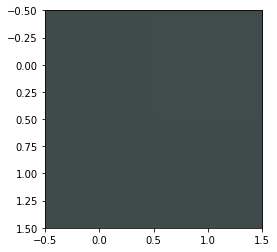

[0.16806787 0.83193213]


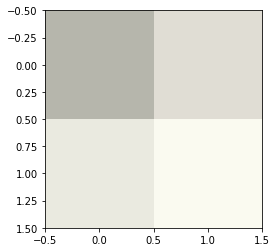

[7.54289935e-05 9.99924571e-01]


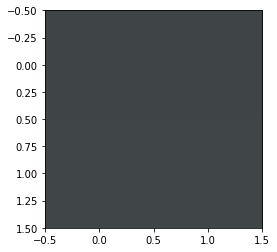

[0.01771069 0.98228931]


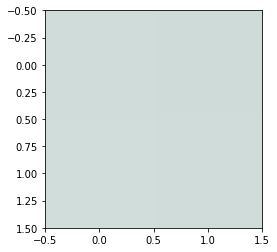

[0.107266 0.892734]


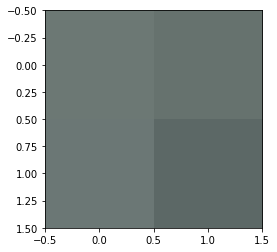

[0.00185827 0.99814173]


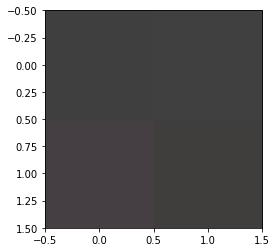

In [9]:
#img = wms.getmap(layers=['avoindata:Ortoilmakuva_2019_5cm'],srs='EPSG:4326',bbox=(24.939,60.161,24.945,60.164),size=(5000,5000),format='image/jpeg',transparent=True)
nr_x = 12 
nr_y = 10
patch_box = (xmin+nr_x*patch_x,ymin+nr_y*patch_y,xmin+(nr_x+1)*patch_x,ymin+(nr_y+1)*patch_y) 

ortholayer = 'avoindata:Ortoilmakuva_2019_5cm'
cs = 'EPSG:4326'
resx=1000
res = (resx,resx)
img = wms.getmap(layers=[ortholayer],srs=cs,bbox=patch_box,size=res,format='image/jpeg',transparent=True)

#filename = "Helsinki_patch_x%d_patch_y%d" %  #+'{:06.2f}'.format(3.141592653589793)
#filename = 'Helsinki_patchx_{:03d}_patchy_{:03d}_resolution_{:03d}.jpg'.format(10,10,resx) 


A = np.asarray(Image.open(io.BytesIO(img.read()))) # mpimg.imread(filename)

img = wms.getmap(layers=['Karttasarja'],srs=cs,bbox=patch_box,size=res,format='image/jpeg',transparent=True)

A_layer_1 = np.asarray(Image.open(io.BytesIO(img.read())))

plt.imshow(A)

#plt.imshow(mpimg.imread('out.jpg'))


nr_non_marking_samples = 100; 

rows = np.random.randint(50,900, size=nr_non_marking_samples)
cols = np.random.randint(20,600,size=nr_non_marking_samples)

plt.scatter(cols, rows,s=60, c='r', marker='.')
plt.show()

X_new = np.zeros((nr_non_marking_samples,nr_features))
for iter_sample in range(nr_non_marking_samples):
        pixelx = cols[iter_sample] 
        pixely = rows[iter_sample]
        B =  A[(pixely-len_y):(pixely+len_y),(pixelx-len_x):(pixelx+len_x)]
        tmp = B.reshape(1,-1)
        B = A_layer_1[(pixely-len_y):(pixely+len_y),(pixelx-len_x):(pixelx+len_x)]
        tmp_1 = B.reshape(1,-1)
        X_new[iter_sample,:] = np.hstack((tmp,tmp_1));
      #  X_new[iter_sample,:] = tmp; 

out = clf.predict(X_new)
out_prob = clf.predict_proba(X_new)

samples_wrong = np.where(out> 0) 
samples_wrong= samples_wrong[0]

number = samples_wrong.shape[0]
for iter_i in range(number): 
    C = X_tmp[samples_wrong[iter_i],:int(nr_features/2)]
    C = (C.reshape((2*len_y,2*len_x,3)))
    print(out_prob[samples_wrong[iter_i],:])
    plt.imshow(C/255) 
    plt.show()
    

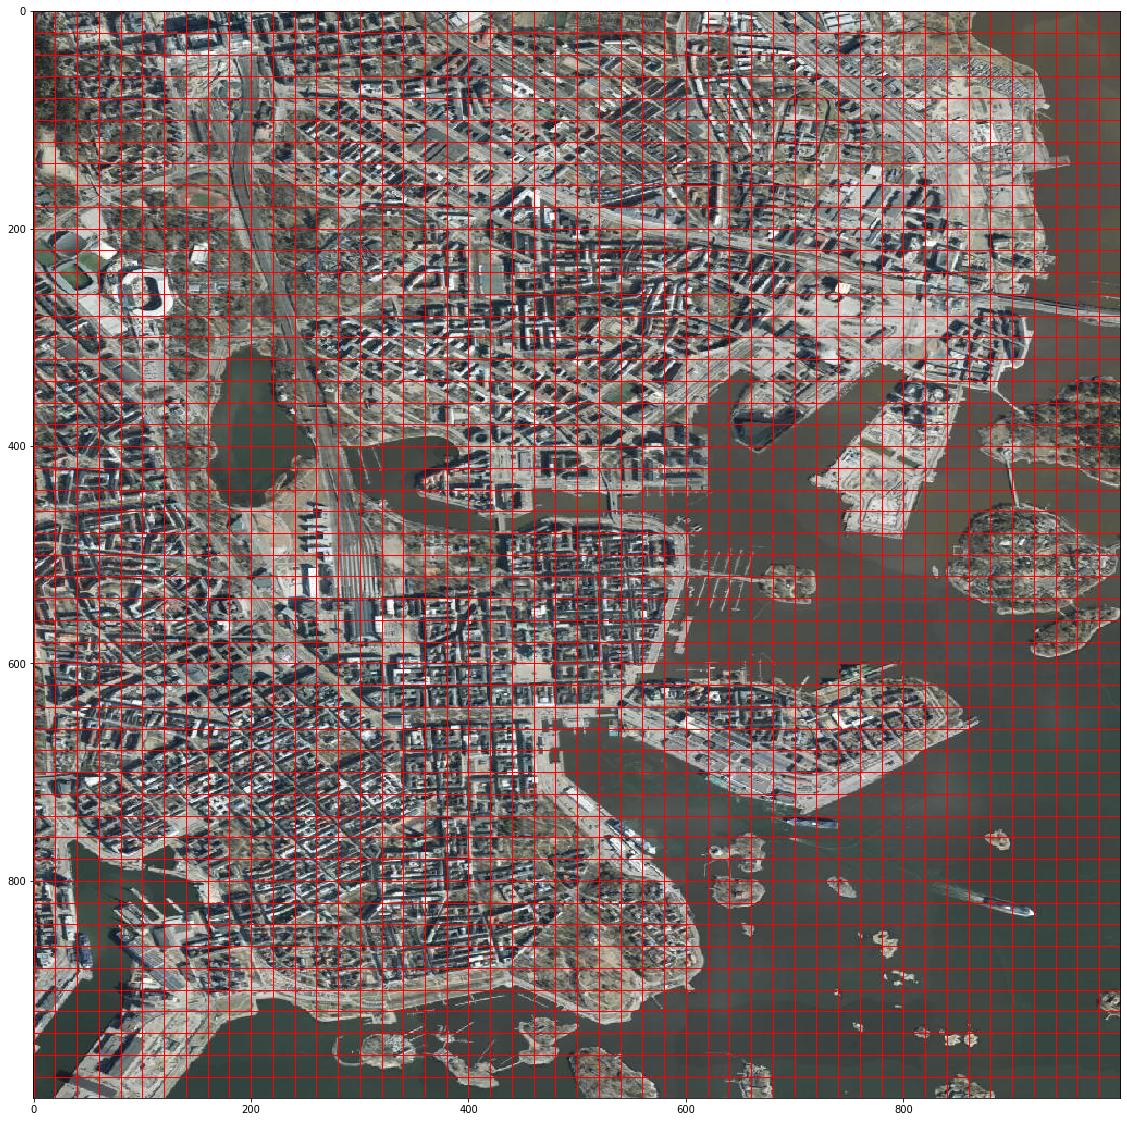

In [27]:
import io
import math

ortholayer = 'avoindata:Ortoilmakuva_2019_5cm'
cs = 'EPSG:4326'
layer='avoindata:Ortoilmakuva_2019_5cm'
resx=1000
res = (resx,resx)
patch_box = (xmin,ymin,xmax,ymax) 
img = wms.getmap(layers=[ortholayer],srs=cs,bbox=patch_box,size=res,format='image/jpeg',transparent=True)
pic = Image.open(io.BytesIO(img.read()))
plt.figure(figsize=(20,20))
plt.imshow(np.array(pic.getdata()).reshape(pic.size[0], pic.size[1], 3))
delta_x = math.floor(resx/nr_patches_x) ; 
delta_y = math.floor(resx/nr_patches_y) ; 

for x in range(nr_patches_x):
     plt.plot([0,resx-1],[x*delta_x,x*delta_x],'-',color='red',linewidth=1)
        
for y in range(nr_patches_y):
     plt.plot([y*delta_y,y*delta_y],[0,resx-1],'-',color='red',linewidth=1)
plt.savefig('Helsinki_map.jpg')  
plt.show() 